<a href="https://colab.research.google.com/github/NaelW/2024_Geoinformatique_I/blob/main/Geoinformatique_I/IP/Exercices_IP/S4_IP_exercice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice 4 - Fonction et calcul scientifique

## Numpy pour le calcul scientifique et Matplotlib

**Objectifs d'apprentissage**

* Créer de nouveaux tableaux en utilisant `linspace` et `arange`.
* Calculer des formules de base avec les tableaux `numpy`.
Charger des données à partir de fichiers `.npy` * Effectuer des réductions (par exemple `.npy`)
* Effectuer des réductions (par exemple `mean`, `std` sur les tableaux `numpy`)
* Réaliser des tracés linéaires 1D
* Réaliser des diagrammes de dispersion
* Annoter les graphiques avec des titres et des axes

Dans ce problème, nous utilisons des données réelles provenant de flotteurs de profilage océanique. Les flotteurs [ARGO](http://www.argo.ucsd.edu/) sont des instruments robotiques autonomes qui recueillent des données sur la température, la salinité et la pression de l'océan. Les flotteurs [ARGO](http://www.argo.ucsd.edu/) recueillent un "profil" (un ensemble de mesures à différentes profondeurs ou "niveaux").

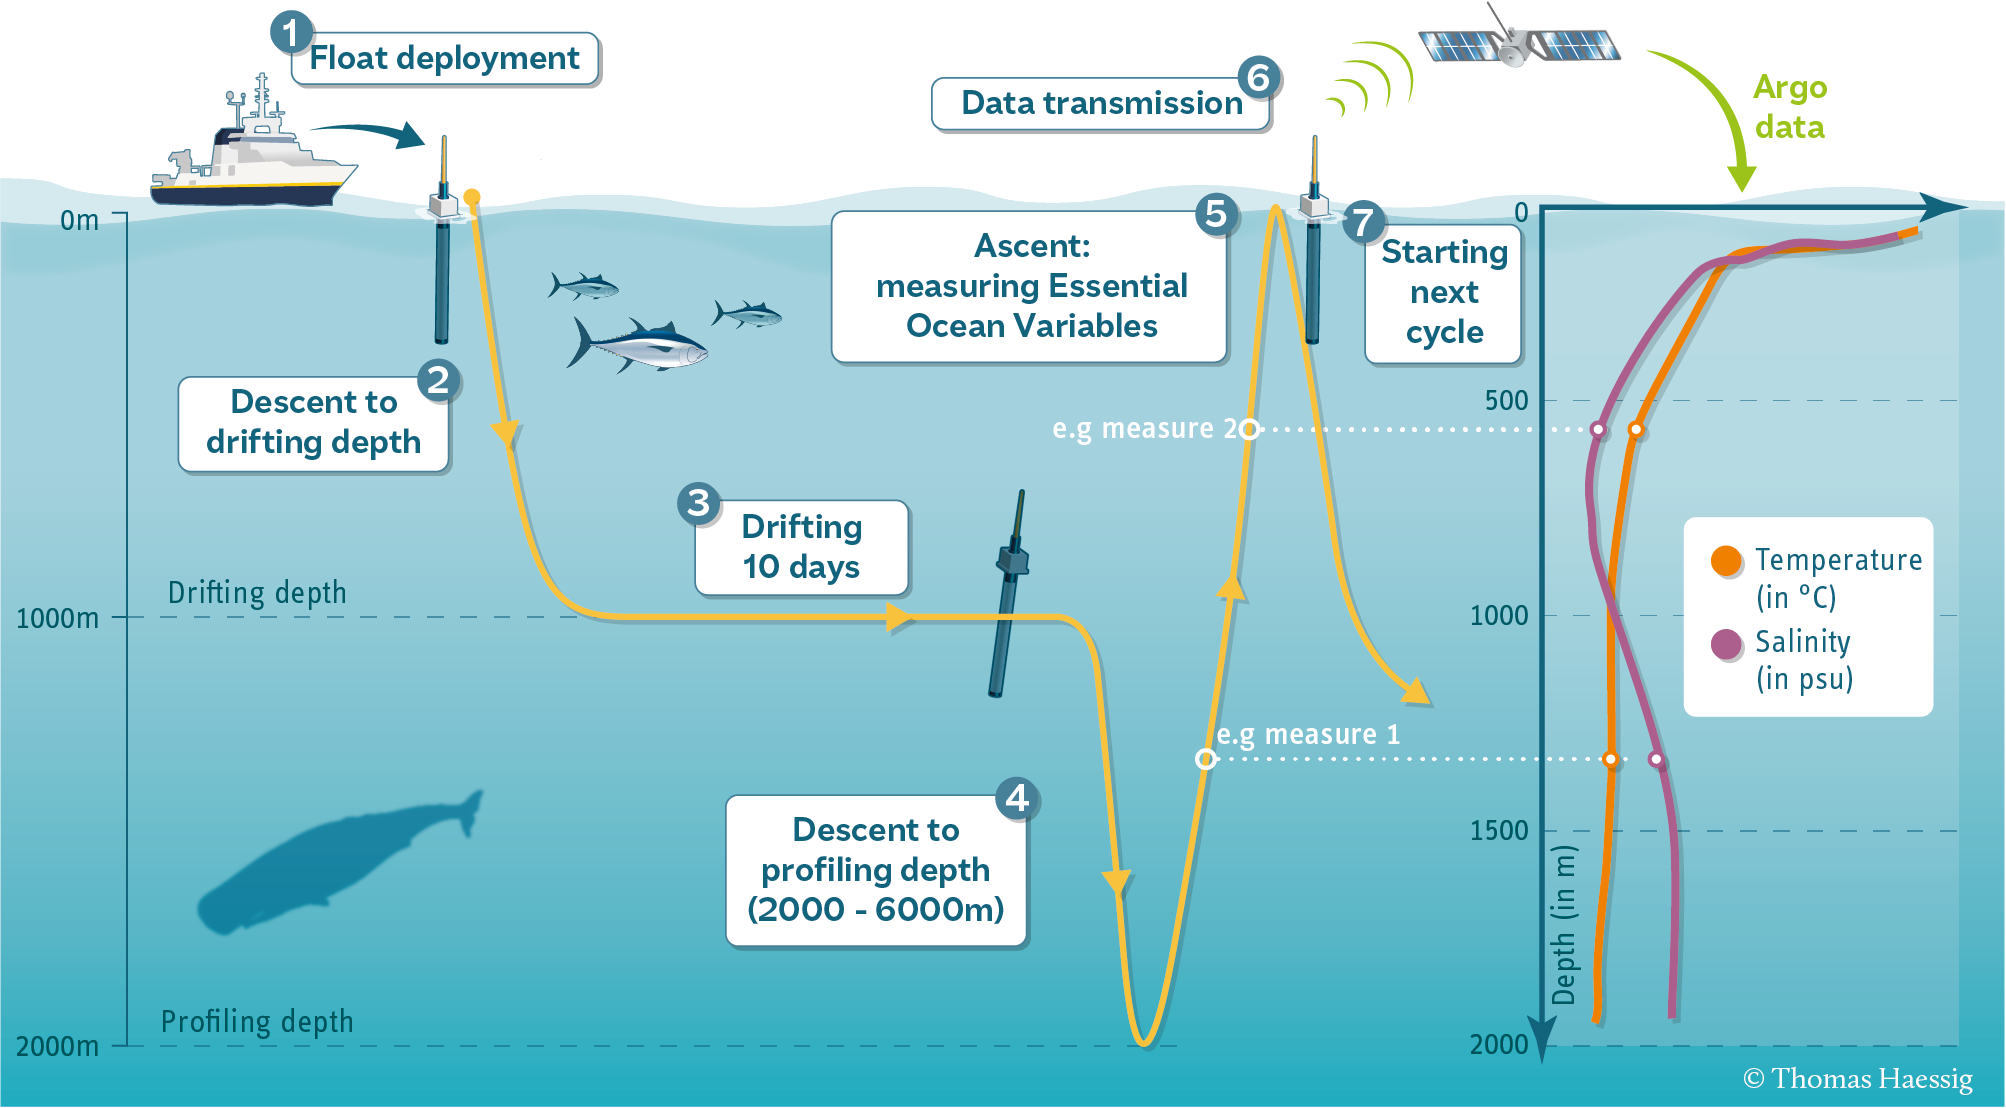


Chaque profil est associé à une latitude, une longitude et une date, ainsi qu'à de nombreux niveaux différents.

Commençons par utiliser [pooch](https://www.fatiando.org/pooch/latest/) pour télécharger les fichiers de données dont nous avons besoin pour cet exercice. Le code suivant vous donnera une liste de fichiers `.npy` que vous pourrez ouvrir à l'étape suivante.

In [3]:
import pooch

url = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ?download=1"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash='2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009')
files

['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy']

In [4]:
import numpy as np

**Q1) Chargez chaque fichier de données sous la forme d'un tableau `numpy`.**

Vous pouvez utiliser les noms que vous voulez pour vos tableaux, mais nous recommandons :

`T` : température

`S` : salinité

`P` : pression

`date` : date

`lat` : latitude

`lon` : longitude

`level` : niveau de profondeur

Astuce 1 : Regardez le nom du fichier (les éléments dans `files`) pour savoir quel fichier correspond à quelle variable.

Astuce 2 : Consultez la documentation de [`np.load`](https://numpy.org/doc/stable/reference/generated/numpy.load.html).

Affichez les noms des éléments des fichiers ici

In [9]:
for file in files:
  print(file)

/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy
/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy
/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy
/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy
/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy
/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy
/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy


Ensuite, chargez les fichiers sous forme de tableaux `numpy`, par exemple en utilisant la compréhension de liste

In [32]:
P,date,lat,S,level,lon,T = [np.load(f) for f in files]

In [ ]:
#@title Code à compléter (au besoin)
___,___,___,___,___,___,___ = [np.___(___[___]) for ___ in range(___)]

**Q2) Recréez le tableau `level` en utilisant `np.arange` et `np.linspace`**.

Conseils :

* La documentation de `np.arange` est [at this link](https://numpy.org/devdocs/reference/generated/numpy.arange.html)
* La documentation pour `np.linspace` est [à ce lien](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
* La documentation pour `np.testing.assert_equal` est [at this link](https://numpy.org/doc/stable/reference/generated/numpy.testing.assert_equal.html)

Affichez le tableau `level` (niveau)

In [22]:
level

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77])

Recréer le tableau `level` en utilisant `np.arange` et l'appeler `level_arange`

In [59]:
level_arange = np.arange(0,78)

In [60]:
level_arange

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77])

In [ ]:
#@title Code à compléter (au besoin)
level_arange = np.arange(___,___)

Vérifiez que `level` et `level_arange` sont égaux en utilisant `np.testing.assert_equal`

In [139]:
np.testing.assert_equal(level, level_arange)

In [ ]:
#@title Code à compléter (au besoin)
np.___.___(___,level_arange)

Recréer le tableau `level` en utilisant `np.linspace` et l'appeler `level_linspace`

In [77]:
level_linspace = np.linspace(0,77,77)

In [78]:
level_linspace

array([ 0.        ,  1.01315789,  2.02631579,  3.03947368,  4.05263158,
        5.06578947,  6.07894737,  7.09210526,  8.10526316,  9.11842105,
       10.13157895, 11.14473684, 12.15789474, 13.17105263, 14.18421053,
       15.19736842, 16.21052632, 17.22368421, 18.23684211, 19.25      ,
       20.26315789, 21.27631579, 22.28947368, 23.30263158, 24.31578947,
       25.32894737, 26.34210526, 27.35526316, 28.36842105, 29.38157895,
       30.39473684, 31.40789474, 32.42105263, 33.43421053, 34.44736842,
       35.46052632, 36.47368421, 37.48684211, 38.5       , 39.51315789,
       40.52631579, 41.53947368, 42.55263158, 43.56578947, 44.57894737,
       45.59210526, 46.60526316, 47.61842105, 48.63157895, 49.64473684,
       50.65789474, 51.67105263, 52.68421053, 53.69736842, 54.71052632,
       55.72368421, 56.73684211, 57.75      , 58.76315789, 59.77631579,
       60.78947368, 61.80263158, 62.81578947, 63.82894737, 64.84210526,
       65.85526316, 66.86842105, 67.88157895, 68.89473684, 69.90

In [ ]:
#@title Code à compléter (au besoin)
___ = np.___(___,___,___)

Vérifiez que `level` et `level_linspace` sont égaux en utilisant `np.testing.assert_equal`

In [80]:
np.testing.assert_equal(level, level_linspace) #pas possible car linspace tjr décimales

AssertionError: 
Arrays are not equal

(shapes (78,), (77,) mismatch)
 x: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,...
 y: array([ 0.      ,  1.013158,  2.026316,  3.039474,  4.052632,  5.065789,
        6.078947,  7.092105,  8.105263,  9.118421, 10.131579, 11.144737,
       12.157895, 13.171053, 14.184211, 15.197368, 16.210526, 17.223684,...

In [ ]:
#@title Code à compléter (au besoin)
___.___(___,___)

**Q3) Examinez les formes de `T`, `S` et `P` par rapport à `lon`, `lat`, `date` et `niveau`. Comment pensez-vous qu'ils sont liés ?**

Indice : consultez la sous-section [NDArrays](#NDArrays)

Affichez les formes de toutes les variables chargées

In [143]:
T.shape
S.shape
P.shape

(78, 75)

In [107]:
lon.shape
lat.shape
date.shape

(75,)

In [105]:
level.shape

(78,)

In [112]:
type(T.shape)
type(S.shape)
type(P.shape)
type(lon.shape)
type(lat.shape)
type(date.shape)
type(level.shape)

tuple

In [ ]:
# lon, lat et date donnent où et quand on étés prises les données T, S, P sous forme de tableau et Level donne la profondeur de chaques mesures (ou inversement)

In [ ]:
#@title Code à compléter (au besoin)
___.shape
___.___

D'après les formes, quelles sont les dimensions partagées entre les tableaux ?

**Q4) En vous basant sur la formule ci-dessous, calculez la densité de l'eau de mer `relative_density`, par rapport à l'eau pure, en fonction de la température, de la salinité et de la pression.**

`densité_relative`$ = ρ -ρ_{Eau pure} = a \times S +b \times \Theta + c \times \Theta^{2}$

où :

* Les densités $\rho$ et $ρ_{Pure\ eau}$ sont exprimées en unités $kg/m^{3}$.
* Les constantes $a$, $b$ et $c$ sont fournies ci-dessous.
* La fonction permettant de calculer la température conservative $\Theta$ (en unités Celcius) à partir de la température, de la salinité et de la pression est fournie ci-dessous.
* La température $T$ est exprimée en unités Celcius.
* La salinité $S$ est exprimée en unités $g/kg$.
* La pression $p$ est exprimée en unités $dbar$.

Astuce : Les tableaux `numpy` chargés `temperature`, `salinity`, et `pressure` ont déjà les bonnes unités et aucune conversion n'est nécessaire.

Sources :

1) [*Roquet, Fabien, et al. "Defining a simplified yet "realistic" equation of state for seawater." Journal of Physical Oceanography 45.10 (2015) : 2564-2579.*](https://journals.ametsoc.org/view/journals/phoc/45/10/jpo-d-15-0080.1.xml)

2) [*The Gibbs SeaWater (GSW)
Oceanographic Toolbox of TEOS-10*](https://www.teos-10.org/pubs/gsw/html/gsw_front_page.html). (Licence)](https://www.teos-10.org/pubs/gsw/html/gsw_licence.html)

Voici les constantes a, b et c :

In [113]:
a = 7.718e-1
b = -8.44e-2
c = -4.561e-3

Importons la bibliothèque [`gsw`] (https://teos-10.github.io/GSW-Python/) qui contient la fonction `CS_from_t` pour calculer la température conservative $\Theta$ à partir de la température, de la salinité et de la pression.

In [114]:
!pip install gsw
from gsw import CT_from_t

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 24.0 MB/s eta 0:00:00


Maintenant, c'est à vous de jouer. Voici l'équation pour éviter d'avoir à faire défiler la page vers le haut :

`densité_relative`$ = ρ -ρ_{Pure\ Eau} = a \times S +b \times \Theta + c \times \Theta^{2}$

Calculer la température conservatrice

Conseil : utilisez [CT_from_t](https://www.teos-10.org/pubs/gsw/html/gsw_CT_from_t.html)

In [144]:
CT = CT_from_t(S,T,P)

In [125]:
CT

array([[18.95038389, 18.41702486, 19.07746816, ..., 19.0838613 ,
        21.79604023, 20.10691816],
       [18.7167823 , 18.37902205, 19.05973411, ..., 18.44249588,
        19.43744461, 20.10022206],
       [18.34343364, 18.3522886 , 19.04195407, ..., 18.20006431,
        19.23615405, 20.05124564],
       ...,
       [ 3.6359899 ,  3.65662809,  3.64478998, ...,  3.64962307,
         3.65341962,  3.70166094],
       [ 3.60272526,  3.61639726,  3.59575608, ...,  3.59259633,
         3.58470724,  3.6437391 ],
       [ 3.57826951,  3.58028581,  3.55956863, ...,         nan,
         3.54839488,         nan]])

In [148]:
#@title Code à compléter (au besoin)

densité_relative = CT_from_t(S,T,P)
densité_relative

array([[18.95038389, 18.41702486, 19.07746816, ..., 19.0838613 ,
        21.79604023, 20.10691816],
       [18.7167823 , 18.37902205, 19.05973411, ..., 18.44249588,
        19.43744461, 20.10022206],
       [18.34343364, 18.3522886 , 19.04195407, ..., 18.20006431,
        19.23615405, 20.05124564],
       ...,
       [ 3.6359899 ,  3.65662809,  3.64478998, ...,  3.64962307,
         3.65341962,  3.70166094],
       [ 3.60272526,  3.61639726,  3.59575608, ...,  3.59259633,
         3.58470724,  3.6437391 ],
       [ 3.57826951,  3.58028581,  3.55956863, ...,         nan,
         3.54839488,         nan]])

Calculez la "densité relative" à l'aide de l'équation ci-dessus.

In [129]:
densité_relative = a*S + b*CT + c*CT**2
densité_relative

array([[24.26878778, 24.30901623, 24.18510597, ..., 24.37483439,
        23.60704513, 23.98828331],
       [24.32477667, 24.32400413, 24.19045883, ..., 24.53101768,
        24.09992029, 23.98930505],
       [24.45644758, 24.33382758, 24.19427794, ..., 24.58041622,
        24.21339484, 24.000865  ],
       ...,
       [26.58088425, 26.58466521, 26.58605858, ..., 26.59390729,
        26.5980916 , 26.59702996],
       [26.58479005, 26.58939524, 26.59027359, ..., 26.59905835,
        26.60307089, 26.60154496],
       [26.58919785, 26.59362837, 26.59605156, ...,         nan,
        26.60731704,         nan]])

In [ ]:
#@title Code à compléter (au besoin)
___ = ___

**Q4) Faites un graphique pour chaque colonne de données dans `T`, `S`, `P`, et
`densité_relative` (quatre plots)**

Pour cette question, nous devons utiliser l'interface [Pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) de la bibliothèque [Matplotlib](https://matplotlib.org/) pour la visualisation, même si nous ne l'avons pas encore étudiée en profondeur en classe. Mais n'ayez crainte, nous vous fournissons des instructions faciles à suivre ci-dessous. 😊

La première étape consiste à importer Pyplot. Il suffit d'exécuter le code ci-dessous.

In [149]:
import matplotlib.pyplot as plt

Ensuite, nous tracerons les variables en fonction de la profondeur de l'océan, `level`. Il suffit de lire la documentation [sur ce lien] (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) pour en déduire la syntaxe correcte. Etiquetez vos axes en utilisant `plt.xlabel` et `plt.ylabel`, et ajoutez un titre en utilisant `plt.title`.

Astuce : L'échelle verticale doit utiliser les données `level` pour être cohérente avec les conventions océanographiques.

Conseil 2 : Chaque graphique doit avoir une ligne pour chaque colonne de données. Le résultat sera désordonné, comme dans le graphique ci-dessous :

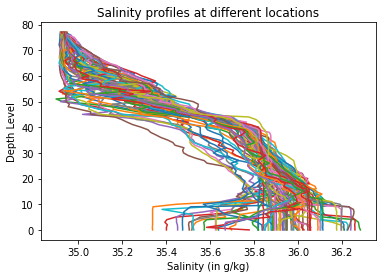

Text(0.5, 1.0, 'Température à différentes profondeurs')

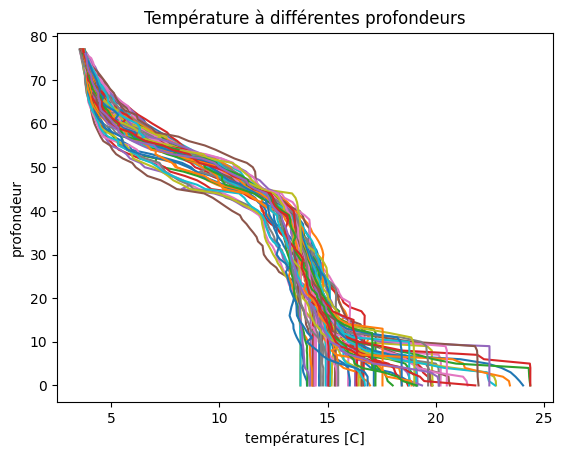

In [150]:
plt.plot(T,level) ; # Le point-virgule empêche l'impression des objets de ligne
plt.xlabel("températures [C]") # Prend une chaîne de caractères comme argument
plt.ylabel("profondeur")
plt.title("Température à différentes profondeurs")

Faites plus de plots ci-dessous:

Text(0.5, 1.0, 'Salinité à différentes profondeurs')

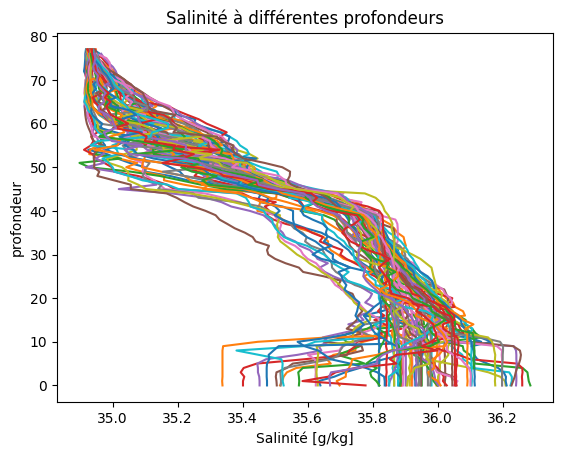

In [151]:
plt.plot(S,level) ; # Le point-virgule empêche l'impression des objets de ligne
plt.xlabel("Salinité [g/kg]") # Prend une chaîne de caractères comme argument
plt.ylabel("profondeur")
plt.title("Salinité à différentes profondeurs")

Text(0.5, 1.0, 'Pression à différentes profondeurs')

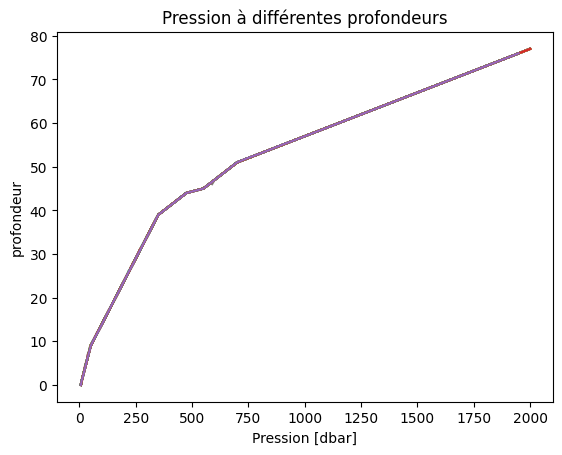

In [155]:
plt.plot(P,level) ; # Le point-virgule empêche l'impression des objets de ligne
plt.xlabel("Pression [dbar]") # Prend une chaîne de caractères comme argument
plt.ylabel("profondeur")
plt.title("Pression à différentes profondeurs")

Text(0.5, 1.0, "Densité relative de l'eau à différentes profondeurs")

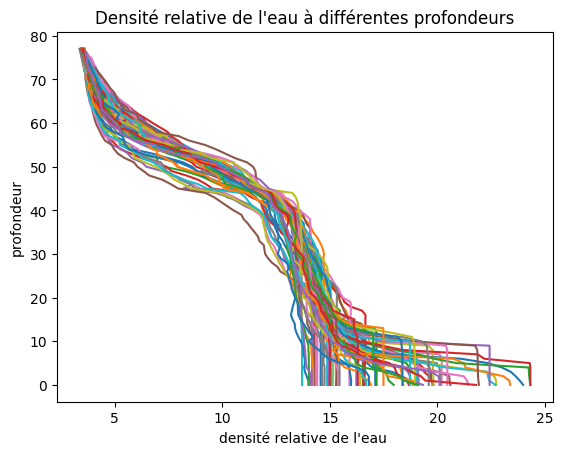

In [153]:
plt.plot(densité_relative,level) ; # Le point-virgule empêche l'impression des objets de ligne
plt.xlabel("densité relative de l'eau ") # Prend une chaîne de caractères comme argument
plt.ylabel("profondeur")
plt.title("Densité relative de l'eau à différentes profondeurs")

**Q5) Calculez la moyenne et l'écart-type de `T`, `S`, `P`, et `seawater_density` à chaque profondeur dans `level`.

Conseil : Vous pouvez lire la documentation sur [ce lien](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) et [ce lien](https://numpy.org/doc/stable/reference/generated/numpy.std.html).

Conseil 2 : Vous pouvez vérifier que vous avez pris la moyenne et les écarts types le long des axes corrects en vérifiant la "forme" de vos résultats.

Calculez les moyennes...

In [160]:
Moyenne_T = np.mean(T,1)
Moyenne_T

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan, 10.80430666, 10.49702667, 10.1749066 ,  9.83453334,
        9.48625332,  9.19793334,  8.66010666,  8.12324001,  7.60221333,
        7.15289333,  6.74250667,  6.39543999,  6.04598667,  5.74538665,
        5.48913333,  5.26604001,  5.08768   ,  4.93479998,  4.77769334,
        4.65368   ,  4.54237334,  4.44274664,  4.35933333,      

In [161]:
Moyenne_T.shape #78 m^me nb valeurs que T.shape => considère juste

(78,)

In [165]:
Moyenne_S = np.mean(S,1)
Moyenne_S


array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan, 35.41392634, 35.3810557 , 35.34845245, 35.31531555,
       35.28392568, 35.26568334, 35.2389473 , 35.21583745, 35.19686081,
       35.18231257, 35.1648436 , 35.15073542, 35.12509338, 35.10155869,
       35.08199799, 35.06317012, 35.0490097 , 35.03678253, 35.02174266,
       35.01135579, 35.00212936, 34.99386297, 34.98810328,      

In [166]:
Moyenne_S.shape

(78,)

In [192]:
Moyenne_P = np.mean(P,1)
print(Moyenne_P)
print(Moyenne_P.shape)

[   6.43466671           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan  575.68400146  600.42400716  625.30800456  650.34533773
  675.33333984  700.37067546  750.42400716  800.36666992  850.38534017
  900.4613387   950.45067383 1000.38534261 1050.38534668 1100.45734212
 1150.45201335 1200.40534505 1250.25067383 1300.49467773 1350.40268392
 1400.41734538 1450.25734212 1500.40267253 1550.46401367           nan
      

In [171]:
Moyenne_seawater_density = np.mean(densité_relative,1)
print(Moyenne_seawater_density)
print(Moyenne_seawater_density.shape)

[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan 10.71728147 10.40901093
 10.08605241  9.74502857  9.39622288  9.10690636  8.5669619   8.02829061
  7.50564908  7.05447933  6.64230277  6.29315477  5.942041    5.6395164
  5.38105612  5.15557631  4.97444258  4.81855092  4.65862451  4.53142169
  4.41683099  4.31378246  4.22675549         nan         nan         nan
         nan         nan         nan         nan         nan         nan]
(78,)


In [ ]:
#@title Code à compléter (au besoin)
___ = np.___(___,axis=___)
___
___
___

... et les écarts types.

In [173]:
#Même chose avec std au lieu de mean
écart_type_T = np.std(T,1)
print(écart_type_T)
print(écart_type_T.shape)

[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.84204226 0.90031954
 0.94661515 0.9902255  1.01786435 1.01690775 1.01944275 0.97987767
 0.94359878 0.88207755 0.82934499 0.7859263  0.71755907 0.68351183
 0.64382025 0.58990336 0.55077313 0.50187175 0.45673872 0.4085324
 0.36748504 0.33272584 0.2996815         nan        nan        nan
        nan        nan        nan        nan        nan        nan]
(78,)


In [174]:
écart_type_S = np.std(S,1)
print(écart_type_S)
print(écart_type_S.shape)

[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.11644936 0.12211051
 0.12341583 0.12609271 0.12781264 0.12486204 0.12508305 0.12873388
 0.1271157  0.12208639 0.11848103 0.11478619 0.10416219 0.1009587
 0.09565639 0.08961304 0.0856126  0.07880695 0.07300245 0.06582414
 0.05933736 0.05371506 0.04872476        nan        nan        nan
        nan        nan        nan        nan        nan        nan]
(78,)


In [175]:
écart_type_P = np.std(P,1)
print(écart_type_P)
print(écart_type_P.shape)

[0.8534625         nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 1.5931604  0.28791041
 0.50431884 0.3960767  0.58088542 0.5878231  0.46728604 0.38447582
 0.4927975  0.4390579  0.31427165 0.28784061 0.40978017 0.39367447
 0.26551312 0.36947741 0.61174401 0.34210648 0.43511937 0.33283111
 0.52793873 0.55593409 0.35726761        nan        nan        nan
        nan        nan        nan        nan        nan        nan]
(78,)


In [176]:
écart_type_seawater_density = np.std(densité_relative,1)
print(écart_type_seawater_density)
print(écart_type_seawater_density.shape)

[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.83586338 0.89363516
 0.93956071 0.98276901 1.0100934  1.00905369 1.01123305 0.97154642
 0.93511547 0.87373551 0.82110028 0.77774344 0.70981626 0.67586278
 0.63636214 0.58283965 0.54394416 0.49545897 0.45071527 0.40299953
 0.36236767 0.32798294 0.2952927         nan        nan        nan
        nan        nan        nan        nan        nan        nan]
(78,)


In [ ]:
#@title Code à compléter (au besoin)
___ = ___.___(___,___)

Vérifiez qu'elles ont la même forme que vos coordonnées de niveau vertical `lev` :

In [ ]:
# se vérifie en utilisant 0 ou 1 dans axis si le résultat = 78 c'est bon si le résultat est 75 pas bon

In [181]:
#@title Code à compléter (au besoin) #fait que avec une des Moyennes
np.testing.assert_equal(Moyenne_T.shape,level.shape)

**Q6) Faites maintenant des tracés similaires, mais ne montrez que les moyennes `T`, `S`, `P`, et `densité_de_l'eau_de_mer` à chaque profondeur. Faites apparaître les barres d'erreur sur chaque graphique en utilisant les écarts-types**.

Astuce : Si vous vous sentez aventureux, vous pouvez utiliser directement la fonction [`plt.errorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html).

Astuce 2 : Vous devriez obtenir des graphiques similaires à celui ci-dessous

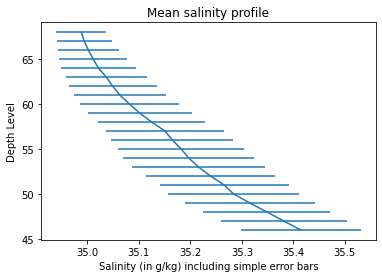

Text(0.5, 1.0, 'Moyenne de température à différentes profondeurs')

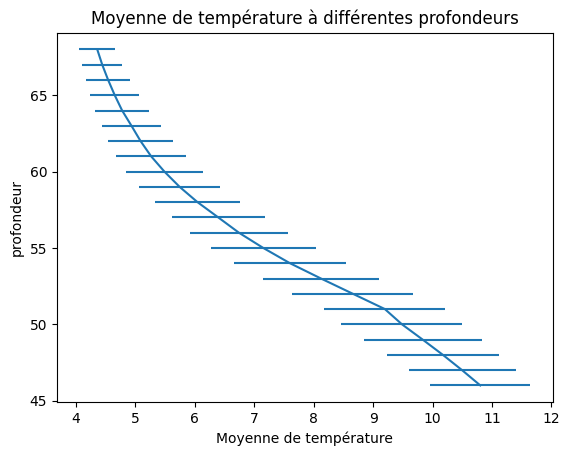

In [186]:
plt.errorbar(Moyenne_T,level,xerr=écart_type_T)
plt.xlabel("Moyenne de température")
plt.ylabel("Profondeur")
plt.title("Moyenne de température à différentes profondeurs")

Encore trois plots et nous serons prêts 🙂 .

Text(0.5, 1.0, 'Moyenne de salinité à différentes profondeurs')

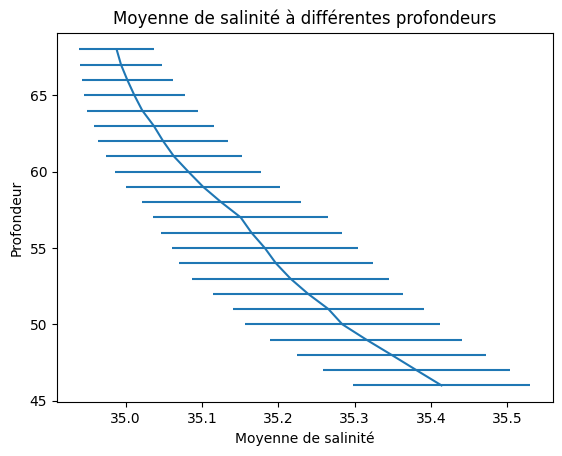

In [187]:
plt.errorbar(Moyenne_S,level,xerr=écart_type_S)
plt.xlabel("Moyenne de salinité")
plt.ylabel("Profondeur")
plt.title("Moyenne de salinité à différentes profondeurs")

Text(0.5, 1.0, 'Moyenne de pression à différentes profondeurs')

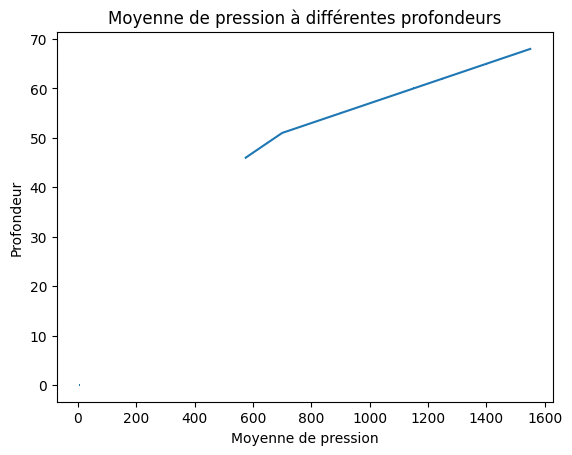

In [188]:
plt.errorbar(Moyenne_P,level,xerr=écart_type_P)
plt.xlabel("Moyenne de pression")
plt.ylabel("Profondeur")
plt.title("Moyenne de pression à différentes profondeurs")

Text(0.5, 1.0, "Densité de l'eau de mer à différentes profondeurs")

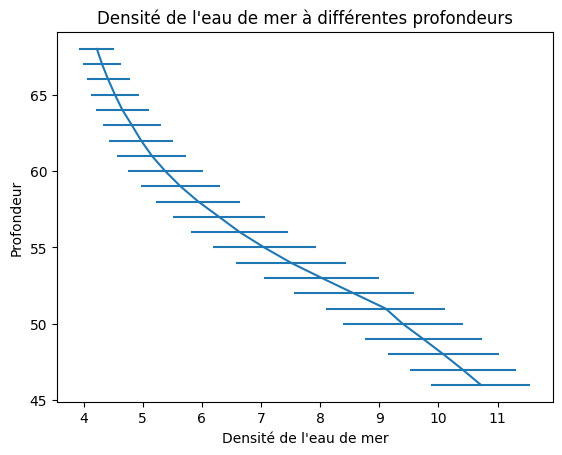

In [191]:
plt.errorbar(Moyenne_seawater_density,level,xerr=écart_type_seawater_density)
plt.xlabel("Densité de l'eau de mer")
plt.ylabel("Profondeur")
plt.title("Densité de l'eau de mer à différentes profondeurs")

**Q7) Prise en compte des données manquantes**

Les profils contiennent de nombreuses valeurs manquantes. Celles-ci sont indiquées par la valeur spéciale "Not a Number", ou `np.nan`.

Lorsque vous prenez la moyenne ou l'écart type des données contenant des NaN, le résultat entier devient `NaN`. Au lieu de cela, si vous utilisez les fonctions spéciales `np.nanmean` et `np.nanstd`, vous dites à NumPy d'ignorer les NaN.

Recalculez les moyennes et les écarts types comme dans les sections précédentes en utilisant ces fonctions et tracez les résultats.

Conseil : Liens vers la documentation [`np.nanmean`](https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html) et la documentation [`np.nanstd`](https://numpy.org/doc/stable/reference/generated/numpy.nanstd.html).

Recalculez les moyennes ci-dessous en ignorant les valeurs manquantes. Nous espérons que vous pouvez maintenant trouver la syntaxe complète vous-même 😎

In [194]:
Nan_mean_T = np.nanmean(T,1)
print(Nan_mean_T)
print(Nan_mean_T.shape)

[17.60172602 17.57223609 17.5145833  17.42326395 17.24943838 17.03730134
 16.76787661 16.44609588 16.17439195 16.04501356 15.65827023 15.4607296
 15.26114862 15.12489191 14.99133783 14.90160808 14.81990544 14.74535139
 14.66822971 14.585027   14.49732434 14.41904053 14.35412163 14.27102702
 14.19081082 14.11487838 14.04347293 13.98067566 13.90994595 13.83274319
 13.76139196 13.69836479 13.62335132 13.54185131 13.46647295 13.39395946
 13.32541891 13.25205403 13.18131082 13.10233782 12.89268916 12.67795943
 12.4649189  12.2178513  11.98270268 11.1281081  10.80430666 10.49702667
 10.1749066   9.83453334  9.48625332  9.19793334  8.66010666  8.12324001
  7.60221333  7.15289333  6.74250667  6.39543999  6.04598667  5.74538665
  5.48913333  5.26604001  5.08768     4.93479998  4.77769334  4.65368
  4.54237334  4.44274664  4.35933333  4.2653784   4.17290539  4.08902703
  3.99864865  3.92163514  3.85617567  3.78916217  3.72950001  3.66207691]
(78,)


In [195]:
Nan_mean_S = np.nanmean(S,1)
print(Nan_mean_S)
print(Nan_mean_S.shape)

[35.9063218  35.90223138 35.90313435 35.90173139 35.90544583 35.9100359
 35.90946015 35.91343146 35.91967712 35.92615988 35.93195456 35.94055356
 35.94091596 35.93905366 35.93931069 35.93786745 35.93525794 35.93118039
 35.92534328 35.91652257 35.90671895 35.89617843 35.88888019 35.8789927
 35.86946183 35.8598671  35.85061713 35.84211978 35.83150467 35.81969395
 35.80945061 35.80092265 35.79078674 35.77886525 35.76833627 35.75838795
 35.74923783 35.73923559 35.73000444 35.71877237 35.68864513 35.65607159
 35.62678265 35.59231774 35.56205662 35.45401408 35.41392634 35.3810557
 35.34845245 35.31531555 35.28392568 35.26568334 35.2389473  35.21583745
 35.19686081 35.18231257 35.1648436  35.15073542 35.12509338 35.10155869
 35.08199799 35.06317012 35.0490097  35.03678253 35.02174266 35.01135579
 35.00212936 34.99386297 34.98810328 34.98008094 34.97214884 34.96517645
 34.95664983 34.9507985  34.9465696  34.94198907 34.93844852 34.93290652]
(78,)


In [196]:
Nan_mean_P = np.nanmean(P,1)
print(Nan_mean_P)
print(Nan_mean_P.shape)

[   6.43466671   10.56891882   15.54246568   20.46301361   25.42567552
   30.44459441   35.44324375   40.4391894    45.40810832   50.37837879
   60.47297323   70.48378413   80.40270347   90.48243311  100.51216311
  110.46081151  120.52702795  130.49459282  140.51216064  150.40540376
  160.40810559  170.36216035  180.41080949  190.4108097   200.39999761
  210.34729499  220.32026858  230.31351224  240.28918808  250.41486297
  260.39999843  270.36891752  280.42432136  290.42297075  300.4229691
  310.46351087  320.50675346  330.5297266   340.41891521  350.49729383
  375.41080867  400.3797294   425.29864626  450.38378205  475.30675403
  550.47703016  575.68400146  600.42400716  625.30800456  650.34533773
  675.33333984  700.37067546  750.42400716  800.36666992  850.38534017
  900.4613387   950.45067383 1000.38534261 1050.38534668 1100.45734212
 1150.45201335 1200.40534505 1250.25067383 1300.49467773 1350.40268392
 1400.41734538 1450.25734212 1500.40267253 1550.46401367 1600.44055011
 1650.3

In [198]:
Nan_mean_seawater_density= np.nanmean(densité_relative,1)
print(Nan_mean_seawater_density)
print(Nan_mean_seawater_density.shape)

[17.57087278 17.54079764 17.48228223 17.39017838 17.21545004 17.00240692
 16.73225594 16.40967749 16.13713026 16.00687422 15.61865271 15.41952161
 15.21861306 15.08102538 14.94610316 14.85502712 14.77198403 14.69614424
 14.61778455 14.53345892 14.44466033 14.36529772 14.29918787 14.21501765
 14.13372328 14.05671899 13.98422822 13.92031346 13.84854489 13.77033103
 13.69794858 13.63383943 13.55780757 13.47536318 13.39900217 13.32548631
 13.2559201  13.18157523 13.10985294 13.02995599 12.81816675 12.60141945
 12.38634865 12.1375301  11.90057973 11.04198639 10.71728147 10.40901093
 10.08605241  9.74502857  9.39622288  9.10690636  8.5669619   8.02829061
  7.50564908  7.05447933  6.64230277  6.29315477  5.942041    5.6395164
  5.38105612  5.15557631  4.97444258  4.81855092  4.65862451  4.53142169
  4.41683099  4.31378246  4.22675549  4.12938587  4.0335162   3.94612669
  3.85237986  3.77180731  3.70261346  3.63191485  3.56844069  3.49744931]
(78,)


De même, recalculez les écarts types en ignorant les valeurs manquantes.

In [199]:
nan_écart_type_T = np.nanstd(T,1)
print(nan_écart_type_T)
print(nan_écart_type_T.shape)

[2.92500898 2.86405591 2.83324563 2.75112353 2.60248422 2.42649165
 2.20220589 1.99752543 1.79105862 1.74132795 1.26608465 1.07857596
 0.89761236 0.79748479 0.68525328 0.6394096  0.61835635 0.59387877
 0.56010736 0.55009107 0.53183794 0.52634089 0.52668259 0.51009182
 0.49376838 0.48980214 0.48551874 0.48516171 0.49244536 0.50557331
 0.50881718 0.50482633 0.50093284 0.51411271 0.50962002 0.51399949
 0.52544584 0.53182873 0.5466501  0.55060902 0.56066216 0.57937588
 0.5989958  0.63392862 0.70640057 0.85775269 0.84204226 0.90031954
 0.94661515 0.9902255  1.01786435 1.01690775 1.01944275 0.97987767
 0.94359878 0.88207755 0.82934499 0.7859263  0.71755907 0.68351183
 0.64382025 0.58990336 0.55077313 0.50187175 0.45673872 0.4085324
 0.36748504 0.33272584 0.2996815  0.25570195 0.21802589 0.17365755
 0.14408683 0.11509768 0.09214697 0.08062746 0.06846311 0.06550644]
(78,)


In [200]:
nan_écart_type_P = np.nanstd(P,1)
print(nan_écart_type_P)
print(nan_écart_type_P.shape)

[0.8534625  0.37341592 0.38353723 0.36770566 0.55606262 0.50754902
 0.42492636 0.6317751  0.48483957 0.65125039 0.40346418 0.4673176
 0.56304492 0.47487075 0.44050136 0.51091269 0.26877946 0.37268007
 0.2706112  0.29950074 0.42956802 0.33438258 0.31173771 0.37437015
 0.34679885 0.44303045 0.63734733 0.51525968 0.70184377 0.5223867
 0.51517567 0.61400897 0.51982487 0.49389381 0.54115544 0.40921099
 0.3580466  0.30919436 0.34628242 0.30929789 0.30294174 0.3579114
 0.36852196 0.49155671 0.55271425 0.4291849  1.5931604  0.28791041
 0.50431884 0.3960767  0.58088542 0.5878231  0.46728604 0.38447582
 0.4927975  0.4390579  0.31427165 0.28784061 0.40978017 0.39367447
 0.26551312 0.36947741 0.61174401 0.34210648 0.43511937 0.33283111
 0.52793873 0.55593409 0.35726761 0.27060041 0.35534457 0.56095549
 0.42508157 0.40772683 0.30768563 0.32852691 0.32928914 1.3524533 ]
(78,)


In [201]:
nan_écart_type_seawater_density = np.nanstd(densité_relative,1)
print(nan_écart_type_seawater_density)
print(nan_écart_type_seawater_density.shape)

[2.92312679 2.86207048 2.83111331 2.74890058 2.60033062 2.42440478
 2.20008036 1.9951145  1.78827661 1.73842313 1.26321473 1.07591323
 0.89508624 0.79515827 0.68291264 0.63718466 0.61600908 0.59153517
 0.55770996 0.54767342 0.52946146 0.5239546  0.52421974 0.5076038
 0.4912895  0.487251   0.48289917 0.48248494 0.48966956 0.50258759
 0.50574731 0.50171906 0.49775599 0.51075241 0.5061951  0.51046711
 0.52176068 0.52802467 0.54269564 0.54658498 0.55655561 0.57513489
 0.59460577 0.62926039 0.70121307 0.85144041 0.83586338 0.89363516
 0.93956071 0.98276901 1.0100934  1.00905369 1.01123305 0.97154642
 0.93511547 0.87373551 0.82110028 0.77774344 0.70981626 0.67586278
 0.63636214 0.58283965 0.54394416 0.49545897 0.45071527 0.40299953
 0.36236767 0.32798294 0.2952927  0.25186518 0.21467855 0.17092665
 0.14178199 0.11322235 0.090626   0.07929707 0.06733157 0.06444322]
(78,)


**Q8) Créez un diagramme de dispersion des coordonnées longitudinales (`lon`) et latitudinales (`lat`) des flotteurs ARGO.**

Encore une fois, nous n'en avons pas parlé dans le tutoriel, mais il existe une fonction de diagramme de dispersion très pratique appelée [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) fournie par l'interface Pyplot.

Bonus : Etiqueter votre figure en utilisant `plt.xlabel`, `plt.ylabel`, et `plt.title`.

Bonus 2 : Augmentez la taille de police de vos étiquettes en ajoutant un argument `fontsize=` aux fonctions d'étiquettes.

Bonus 3 : Rendez votre diagramme de dispersion plus beau en changeant les arguments de [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) listés dans la documentation, par exemple `s=`.

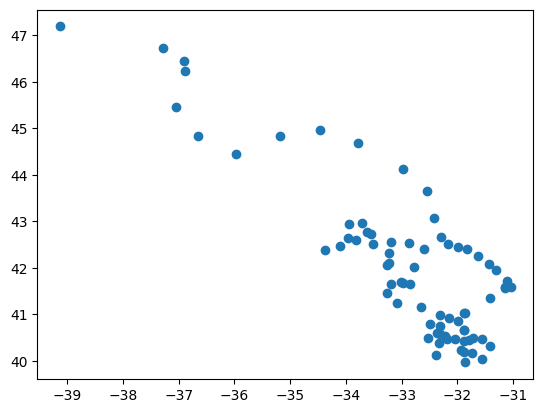

In [202]:
plt.scatter(lon,lat)

Text(0.5, 1.0, 'Coordonées des mesures')

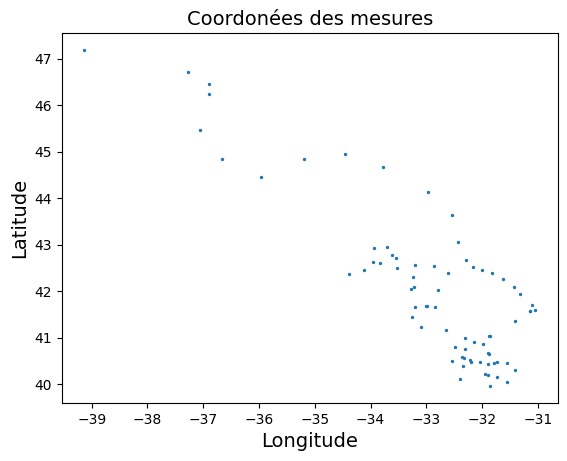

In [207]:
plt.scatter(lon,lat, s=2.0)
plt.xlabel("Longitude",fontsize=14) # Bonus
plt.ylabel("Latitude",fontsize=14)
plt.title("Coordonées des mesures",fontsize=14)
 # Plus de bonus

## Fonctions

**Q1) Ecrivez une fonction pour convertir l'unité que vous avez choisie pour les masses planétaires en $M_{Terre}$, la masse de la Terre**.

Par exemple, la masse de Jupiter est :

$M_{Jupiter} \approx 1898\times10^{24}kg \approx 318 M_{Terre}$

In [208]:
planetdict = {'mercure':0.330,'vénus':4.87,'terre':5.97,
              'mars':0.642,'jupiter':1898,'saturne':568,'uranus':86.8,'nepturne':102, 'pluto':0.013}

# unit: 10^24 kg

In [212]:
# Ecrivez votre fonction ici
# La fonction doit prendre la masse de la planète que vous voulez (par exemple, planetdict['mars']) et la diviser par la masse de la Terre.
# (planetdict['terre'])
def convert_mass_Mterre(M):
  return M/planetdict["terre"]
#tester que cela fonctionne pour jupiter (planetdict['jupiter']), la fonction devrait retourner 317.92294807370183
convert_mass_Mterre(planetdict["jupiter"])

317.92294807370183

In [ ]:
#@title Code à compléter (au besoin)
# Ecrivez votre fonction ici
# La fonction doit prendre la masse de la planète que vous voulez (par exemple, planetdict['mars']) et la diviser par la masse de la Terre.
# (planetdict['terre'])
def convert_mass_Mterre(______=____):
  return _________/planetdict['terre']

#tester que cela fonctionne pour jupiter (planetdict['jupiter']), la fonction devrait retourner 317.92294807370183
convert_mass_Mterre(____________)

**Q2) Ecrivez maintenant une fonction unique qui peut convertir l'unité que vous avez choisie pour les masses planétaires en $M_{Terre}$ ou $M_{Jupiter}$ selon le mot-clé que vous avez spécifié**.

In [217]:
# Écrivez votre fonction ici
def convert_mass_planet(M,planet="terre"):
  return M/planetdict[planet]
# Vérifiez que votre fonction fonctionne : convertissez Mjupiter en Mterre et Mjupiter,
# Vous devriez voir 317.923 (Mterre) et 1.0 (Mjupiter)
print(convert_mass_planet(planetdict["jupiter"]))
print(convert_mass_planet(planetdict["jupiter"],"jupiter")
)

317.92294807370183
1.0


In [ ]:
#@title Code à compléter (au besoin)
# Écrivez votre fonction ici
def convert_m_Mterrejupiter(______=____,ourplanet='jupiter') :
  return ___________/planetdict[ourplanet]

# Vérifiez que votre fonction fonctionne : convertissez Mjupiter en Mterre et Mjupiter,
# Vous devriez voir 317.923 (Mterre) et 1.0 (Mjupiter)
print(convert_m_Mterrejupiter(planetdict['jupiter'],_____),convert_m_Mterrejupiter(planetdict['jupiter'],______))

In [221]:
# Stocker le Mjupiter pour Q3
def convert_m_Mterrejupiter(M,planet="terre"):
  return(M/planetdict["terre"],M/planetdict[planet])
convert_m_Mterrejupiter(planetdict['jupiter'], 'jupiter')


(317.92294807370183, 1.0)

**Q3) Ecrivez une fonction qui prend un argument (la masse en $M_{Jupiter}$) et renvoie deux arguments (la masse en $M_{Terre}$ et la masse dans l'unité que vous avez choisie [la planète que vous voulez]).

In [222]:
# Écrivez votre fonction ici (voir au dessus)
# Vérifiez que la conversion de la masse de Jupiter en $M_{Terre}$ et en $M_{Terre}$ fonctionne.
# l'unité choisie (par exemple, la planète Mars)
convert_m_Mterrejupiter(planetdict['mars'], 'mars')

(0.10753768844221107, 1.0)

In [ ]:
#@title Code à compléter (au besoin)
# Écrivez votre fonction ici
def mass_conversion_two_arguments(mass,planet=____) :
  a = mass/planetdict[_____] # Terre
  b = mass/planetdict[______] # La planète que vous voulez utiliser comme référence
  return a,b
# Vérifiez que la conversion de la masse de Jupiter en $M_{Terre}$ et en $M_{Terre}$ fonctionne.
# l'unité choisie (par exemple, la planète Mars)
print(mass_conversion_two_arguments(_____,'mars'))

In [ ]:
# Bonus : Utilisez la fonction de Q10 pour convertir la masse de Neptune en $M_{Jupiter}$.
# puis la fonction de Q3 pour la reconvertir dans l'unité que vous avez choisie
# Retrouvez-vous la valeur originale ?